In [2]:
import pandas as pd
from fastai import *

In [21]:
def load_data():
    return pd.read_csv('mbti_subreddit_data.csv')

# download_data()

# load up saved data
subreddit_df = load_data()
# Keep only [text, label] columns, and fill NaN values
subreddit_df = subreddit_df.iloc[:, :2]
subreddit_df = subreddit_df.dropna()

In [22]:
from fastai.text import *

subreddit_df = pd.read_csv('mbti_subreddit_data2.csv')
subreddit_df.head()

,Unnamed: 0,label,text
0,0,infj,The Tome of -lore (A user manual for ) Congrat...
1,1,infj,A love letter to s I’ve met a lot of people in...
2,2,infj,It feels weird and sad to feel so much compass...
3,3,infj,Just want a quiet simple life I’ve realized th...
4,4,infj,Does anybody here feels like they want to dele...


In [23]:
def sanitize(text):
    types = ['infj', 'infp', 'intj', 'intp', 'istj', 'istp', 'isfp', 'isfj', 'enfj', 'enfp', 'entj', 'entp', 'estj', 'estp',
       'esfp', 'esfj']
    output_text = text
    for type_ in types:
        output_text = output_text.replace(type_, "")
        output_text = output_text.replace(type_+'s', "")
        output_text = output_text.replace(type_+'\'s', "")
        output_text = output_text.replace(type_.upper(), "")
        output_text = output_text.replace(type_.upper()+'s', "")
        output_text = output_text.replace(type_.upper()+'\'s', "")
    return output_text
pd.options.mode.chained_assignment = None 
# Remove all mentions of one of the sixteen types
for index, row in subreddit_df.iterrows(): 
     subreddit_df.text[index] = sanitize(subreddit_df.text[index])

In [24]:
subreddit_df.shape
subreddit_df.to_csv("mbti_subreddit_data2.csv", index=False)

In [25]:
pd.read_csv('mbti_subreddit_data2.csv')

,Unnamed: 0,label,text
0,0,infj,The Tome of -lore (A user manual for ) Congrat...
1,1,infj,A love letter to s I’ve met a lot of people in...
2,2,infj,It feels weird and sad to feel so much compass...
3,3,infj,Just want a quiet simple life I’ve realized th...
4,4,infj,Does anybody here feels like they want to dele...
5,5,infj,Your Care And Handling User Guide And Manual ...
6,6,infj,Should we just make a new subreddit for s that...
7,7,infj,10 Commandments for an I developed these remi...
8,8,infj,Do you guys ever feel that most of the talking...
9,9,infj,Do you feel guilty when you're relaxing? Like ...


### First we create a language model

In [26]:
data_lm = TextLMDataBunch.from_csv("", "mbti_subreddit_data2.csv",
                                 valid_pct=0.2, text_cols='text', label_cols='label')

In [ ]:
data_lm.show_batch()

In [27]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.144573,3.898413,0.270754,01:19


In [29]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.842225,3.789463,0.283432,01:43
1,3.694977,3.676118,0.300820,01:43
2,3.492847,3.605441,0.312623,01:43
3,3.287298,3.582550,0.317945,01:43
4,3.168401,3.586399,0.318243,01:43


In [30]:
learn.save('lm-trained')
learn.save_encoder('ft_enc')

In [31]:
learn.predict("Hello, I am", n_words=15)

"Hello, I am an female ( 23 m ) early death in ten years Hello lovely 's"

In [32]:
learn.load_encoder('ft_enc')

### Next we use the language model to create a classifier

In [33]:
data_clas = TextClasDataBunch.from_csv('', 'mbti_subreddit_data2.csv', valid_pct=0.2,
                                      vocab=data_lm.train_ds.vocab, bs=10,
                                      text_cols='text', label_cols='label') # same vocab for both models
data_clas.show_batch()

text,target
"xxbos xxmaj common xxmaj questions and xxmaj answers for and about s xxmaj hello s ! xxmaj here is a collection of some stuff i thought captured majority xxunk . xxmaj feel free to make additions , suggest xxunk or even write your own section and add it in . xxmaj press xxunk for fastest answer . \n \n \n xxmaj edit ; xxmaj to whoever gave me xxunk",infj
"xxbos xxmaj shades of xxmaj now seems like a good time to re - surface a collection of very informative threads that someone posted a while ago . \n \n / u / xxmaj intempestivity took the xxup mbti xxmaj step xxup ii test at work , then kindly typed out her * entire xxmaj step xxup ii xxmaj interpretive xxmaj report * and shared it here on /",infj
"xxbos s in relationships xxmaj found this interesting : \n \n * * and * * \n \n * * xxmaj how the relationship works * * : s and s are both very committed in a relationship , and will set clear , concise goals in their own heads of where a relationship is going . xxmaj they love to go out and do things together ,",infj
xxbos xxmaj brief mental health guide and resources for s xxmaj hello s ! i thought it would be great to make a collective document with some useful information and resources to help you bring your best self forward . xxmaj here is an [ informal xxunk : / / www.strawpoll.me / xxunk / r ) collecting data about fellow s and mental health . \n \n xxmaj feel,infj
"xxbos xxmaj dating xxmaj list xxmaj megathread ( xxmaj xxunk ) xxmaj do you like s ? \n xxmaj do you want to try an out for yourself , but are just too shy to ask directly ? \n xxmaj are you tired of ignoring the search button and asking how s feel about your type ? \n \n xxmaj well we 're kind of tired of",entj


In [34]:
classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
classifier.load_encoder('ft_enc')

In [35]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


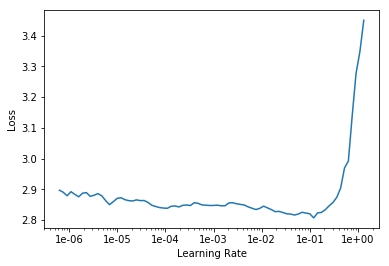

In [ ]:
classifier.recorder.plot()

In [ ]:
classifier.fit_one_cycle(1, 5e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.509150,5.525343,0.167296,03:14


In [ ]:
classifier.save('first')
classifier.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7410 items)
x: TextList
xxbos xxmaj getting lost in time ? xxmaj does anyone else here lose track of time super easily ? 
 
  xxmaj if i 'm interested in something i 'm researching or i find a place to walk around etc . i feel like day spills into night without my noticing .. there 's just not enough hours . xxmaj and it 's so hard to go to bed before 3 am so maybe it 's a sleep schedule thing too ?,xxbos xxmaj anyone dealing with anger issues ? xxmaj how do you guys have dealt or are dealing with this types of emotions ? 
 
  xxmaj recently i 've been feeling angrier than normal , a growing pain product of being powerless and without options for my personal and financial growth . xxmaj its getting so bad i get angry at the slightest , tiniest inconvenience i encounter in my life . 
 
  xxmaj to give some backstory i had to move out of my country because it was unbearable to live there and now i am in a new place full of opportuniti

In [ ]:
classifier.freeze_to(-2)
classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.447389,3.230500,0.188343,03:33


In [ ]:
classifier.save('second')

In [ ]:
classifier.load('second');

In [ ]:
classifier.freeze_to(-3)
classifier.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.344563,3.625040,0.175391,04:21


In [ ]:
classifier.save('third')

In [ ]:
classifier.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7410 items)
x: TextList
xxbos xxmaj getting lost in time ? xxmaj does anyone else here lose track of time super easily ? 
 
  xxmaj if i 'm interested in something i 'm researching or i find a place to walk around etc . i feel like day spills into night without my noticing .. there 's just not enough hours . xxmaj and it 's so hard to go to bed before 3 am so maybe it 's a sleep schedule thing too ?,xxbos xxmaj anyone dealing with anger issues ? xxmaj how do you guys have dealt or are dealing with this types of emotions ? 
 
  xxmaj recently i 've been feeling angrier than normal , a growing pain product of being powerless and without options for my personal and financial growth . xxmaj its getting so bad i get angry at the slightest , tiniest inconvenience i encounter in my life . 
 
  xxmaj to give some backstory i had to move out of my country because it was unbearable to live there and now i am in a new place full of opportuniti

In [ ]:
classifier.unfreeze()
classifier.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.274064,5.780402,0.179709,05:16
1,2.110095,2.812943,0.189962,05:15
2,2.055769,2.632486,0.202375,05:16


In [ ]:
classifier.save('final')

In [ ]:
classifier.recorder.plot_losses()

In [ ]:
from fastai.vision import *
interp = ClassificationInterpretation.from_learner(classifier)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()[:5]


In [ ]:
classifier.predict("")

In [51]:
# export the file
classifier.export()